# MLR model 

In [11]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
filename = "X.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
X = pd.read_csv(filepath,index_col=False, header=0)

In [3]:
filename = "y.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
y = pd.read_csv(filepath,index_col=False, names=["Value"])


## Dataset 

* X

* y

In [4]:
X.head()

,year,Price,lag1,peek1,lag2,peek2,lag3,peek3,lag4,peek4,...,lag8,peek8,lag9,peek9,lag10,peek10,lag11,peek11,lag12,peek12
0,1991,7.41,3.635,3.296,3.829,4.542,4.668,5.006,5.122,5.526,...,5.357,5.283,4.853,4.815,4.403,3.950,3.196,3.749,2.965,3.168
1,1991,7.61,3.058,4.542,3.635,5.006,3.829,5.526,4.668,5.576,...,5.406,4.815,5.357,3.950,4.853,3.749,4.403,3.168,3.196,3.415
2,1991,7.79,3.296,5.006,3.058,5.526,3.635,5.576,3.829,5.853,...,5.675,3.950,5.406,3.749,5.357,3.168,4.853,3.415,4.403,4.705
3,1991,7.98,4.542,5.526,3.296,5.576,3.058,5.853,3.635,5.793,...,5.616,3.749,5.675,3.168,5.406,3.415,5.357,4.705,4.853,5.185
4,1991,8.14,5.006,5.576,4.542,5.853,3.296,5.793,3.058,5.283,...,5.122,3.168,5.616,3.415,5.675,4.705,5.406,5.185,5.357,5.724


In [5]:
# overfitting treatment 
X = X.drop(columns=["lag12", "peek12"])
X.head()

,year,Price,lag1,peek1,lag2,peek2,lag3,peek3,lag4,peek4,...,lag7,peek7,lag8,peek8,lag9,peek9,lag10,peek10,lag11,peek11
0,1991,7.41,3.635,3.296,3.829,4.542,4.668,5.006,5.122,5.526,...,5.406,5.793,5.357,5.283,4.853,4.815,4.403,3.950,3.196,3.749
1,1991,7.61,3.058,4.542,3.635,5.006,3.829,5.526,4.668,5.576,...,5.675,5.283,5.406,4.815,5.357,3.950,4.853,3.749,4.403,3.168
2,1991,7.79,3.296,5.006,3.058,5.526,3.635,5.576,3.829,5.853,...,5.616,4.815,5.675,3.950,5.406,3.749,5.357,3.168,4.853,3.415
3,1991,7.98,4.542,5.526,3.296,5.576,3.058,5.853,3.635,5.793,...,5.122,3.950,5.616,3.749,5.675,3.168,5.406,3.415,5.357,4.705
4,1991,8.14,5.006,5.576,4.542,5.853,3.296,5.793,3.058,5.283,...,4.668,3.749,5.122,3.168,5.616,3.415,5.675,4.705,5.406,5.185


In [6]:
y.head()

,Value
0,3.058
1,3.296
2,4.542
3,5.006
4,5.526


In [7]:
y = y.values.reshape(-1, 1)
print(X.shape, y.shape)

(315, 24) (315, 1)


## Split dataset into Train and Test

Given the dataset is a time series, we will leave the last 12 months as test data.

In [8]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]



## Scale the data and plot the difference

In [9]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)

X_train_scaled: (302, 24)
y_train_scaled: (302, 1)
X_test_scaled: (12, 24)
y_test_scaled: (12, 1)


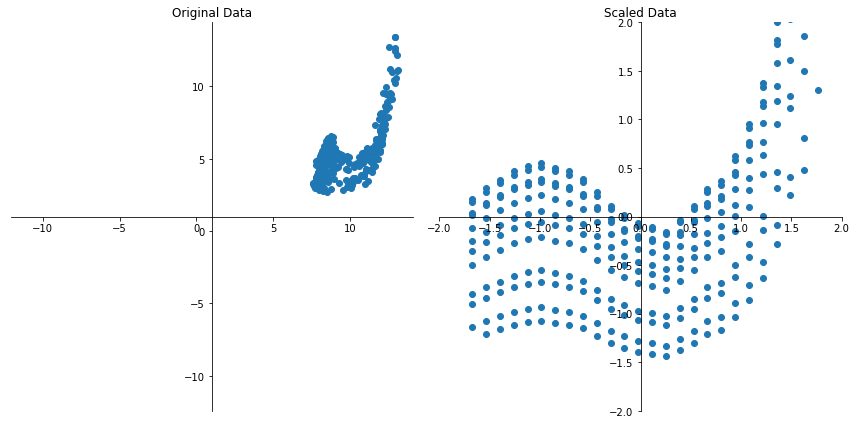

In [10]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")
#Price
maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)
#Price
axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/LR_scaled_features.png")
plt.show()


## Create the Linear Regression model

Train the model and plot results

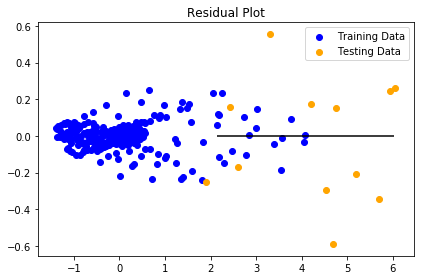

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.tight_layout()
plt.savefig("../../images/LR_residual.png")
plt.show()

## Evaluate the model

In [57]:
 from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.10041120657022053, R2: 0.9483863870336732
